# COVID-19 Detection on X-Ray Images

## 1. Importing the Training & Test Dataset

In [15]:
TRAIN_PATH = "./Train"
VAL_PATH = "./Val"



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *

import keras.utils as image

## 2. Buiding the CNN Architecture

In [17]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [19]:
from keras.preprocessing import image

## 3. Data Augmentation, Normalizing Data & Training the Model

In [20]:
# Train from scratch

train_datagen = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    './Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [22]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [23]:
validation_generator = test_dataset.flow_from_directory(
    './Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [24]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

C:\Users\AKHILA KARAGATLA\AppData\Local\Temp\ipykernel_3528\3418722423.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 39s 5s/step - loss: 1.3369 - accuracy: 0.5223 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 30s 4s/step - loss: 0.6944 - accuracy: 0.5402 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 29s 4s/step - loss: 0.6702 - accuracy: 0.6473 - val_loss: 0.6402 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 30s 4s/step - loss: 0.5204 - accuracy: 0.7812 - val_loss: 0.3888 - val_accuracy: 0.9167
Epoch 5/10
7/7 [==============================] - 30s 4s/step - loss: 0.3686 - accuracy: 0.8214 - val_loss: 0.2793 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 32s 5s/step - loss: 0.3791 - accuracy: 0.8259 - val_loss: 0.2783 - val_accuracy: 0.9500
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.3113 - accuracy: 0.8839 - val_loss: 0.2133 - val_accuracy: 0.9500
Epoch 8/10
7/7 [==================

In [25]:
model.save("model_adv.h5")

In [26]:
model.evaluate_generator(train_generator)

C:\Users\AKHILA KARAGATLA\AppData\Local\Temp\ipykernel_3528\326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.18388934433460236, 0.9419642686843872]

In [27]:
model.evaluate_generator(validation_generator)

C:\Users\AKHILA KARAGATLA\AppData\Local\Temp\ipykernel_3528\3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.1242632046341896, 0.9833333492279053]

## 4. Model Evaluation

In [28]:
model = load_model('model_adv.h5')

In [29]:
import os

In [30]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [31]:
y_actual = []
y_test = []

In [32]:
import keras.utils as image

In [33]:
from PIL import Image
for i in os.listdir("./Val/Normal/"):
  img = image.load_img("./Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 40ms/step


In [34]:
for i in os.listdir("./Val/Covid/"):
  img = image.load_img("./Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 42ms/step


### 4.1 Confusion Matrix

In [35]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_actual, y_test)

<AxesSubplot:>

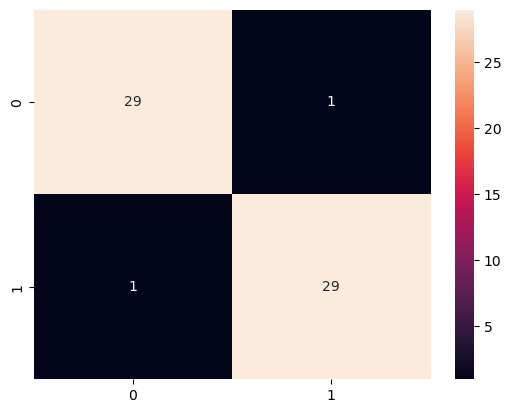

In [38]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

### 4.2 Plotting Training & Validation Loss

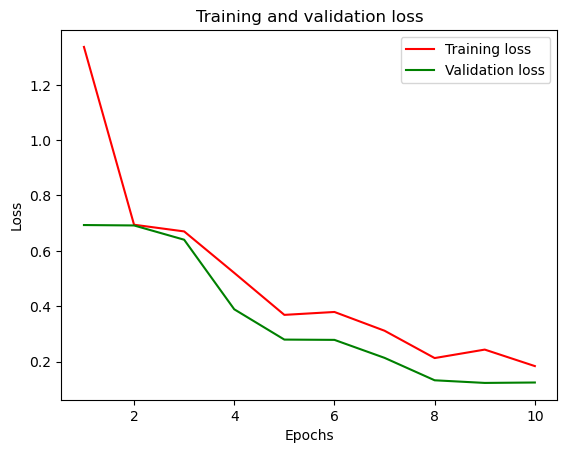

In [39]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.3 Plotting Training & Validation Accuracy

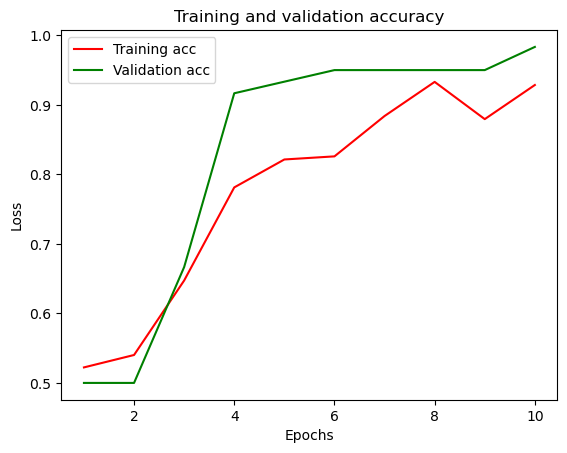

In [40]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Some Comparative Results of Radiologist vs CNN Model on Validation set

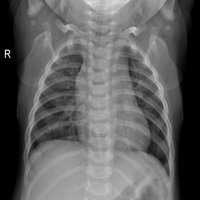

1/1 [==============================] - 0s 52ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


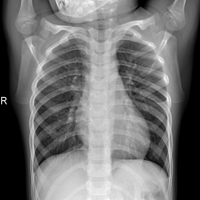

1/1 [==============================] - 0s 77ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


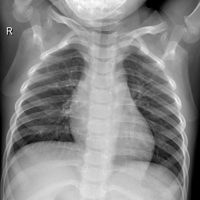

1/1 [==============================] - 0s 47ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


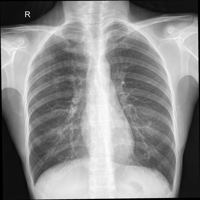

1/1 [==============================] - 0s 47ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


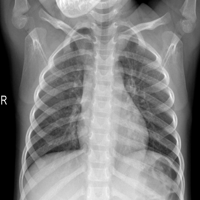

1/1 [==============================] - 0s 43ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


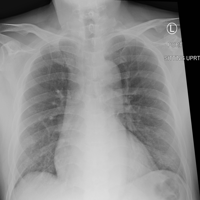

1/1 [==============================] - 0s 42ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


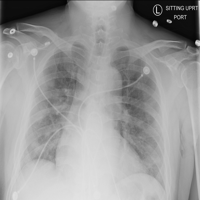

1/1 [==============================] - 0s 41ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


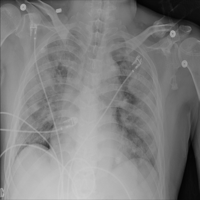

1/1 [==============================] - 0s 41ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


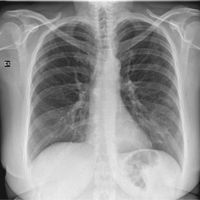

1/1 [==============================] - 0s 40ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


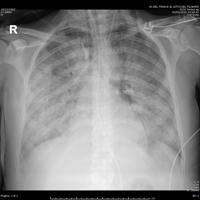

1/1 [==============================] - 0s 46ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [41]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./Val/Normal/"):
  j = j+1
  pil_img = Image.open('./Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./Val/Covid/"):
  j = j+1
  pil_img = Image.open('./Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break

*This Method has not been validated clinically and hence should not be used as it is in any clinical computer aided diagnosis system.*

